In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier, VotingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

Load Data

In [2]:
df = pd.read_csv('../data/telco_customer_churn.csv')

Preprocessing pipeline

In [3]:
X = df.drop(['customerID', 'Churn'], axis=1)
y = df['Churn'].map({'Yes': 1, 'No': 0})

Split

In [4]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

Define Column

In [5]:
numeric_features = X.select_dtypes(include=['int64', 'float64']).columns.tolist()
categorical_features = X.select_dtypes(include=['object']).columns.tolist()

Pipeline preprocessing

In [6]:
preprocessor = ColumnTransformer(
    transformers=[
        ('num', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='median')),
            ('scaler', StandardScaler())
        ]), numeric_features),
        ('cat', Pipeline(steps=[
            ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
            ('onehot', OneHotEncoder(handle_unknown='ignore', sparse_output=False))
        ]), categorical_features)
    ])

Model with Preprocessing

=== MODELING WITH PREPROCESSING ===


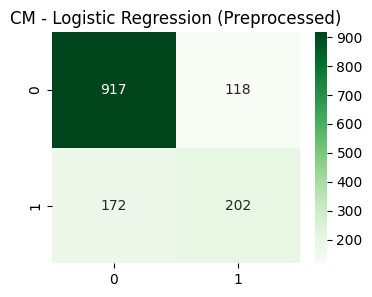

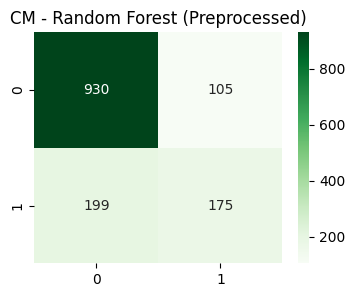

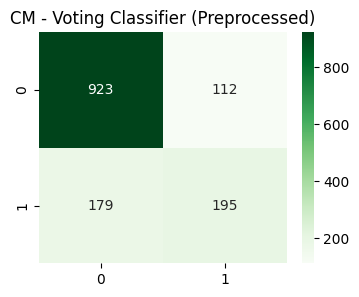


=== HASIL DENGAN PREPROCESSING ===
              Model  Accuracy  Precision   Recall       F1
Logistic Regression  0.794180   0.631250 0.540107 0.582133
      Random Forest  0.784244   0.625000 0.467914 0.535168
  Voting Classifier  0.793471   0.635179 0.521390 0.572687


In [7]:
print("=== MODELING WITH PREPROCESSING ===")

# 1. Logistic Regression dengan preprocessing
lr_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', LogisticRegression(max_iter=1000, random_state=42))
])
lr_pipe.fit(X_train, y_train)
y_pred_lr = lr_pipe.predict(X_test)

# 2. Random Forest dengan preprocessing
rf_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', RandomForestClassifier(random_state=42))
])
rf_pipe.fit(X_train, y_train)
y_pred_rf = rf_pipe.predict(X_test)

# 3. Voting Classifier dengan preprocessing
voting_pipe = Pipeline(steps=[
    ('preprocessor', preprocessor),
    ('classifier', VotingClassifier(
        estimators=[
            ('lr', LogisticRegression(max_iter=1000)),
            ('knn', KNeighborsClassifier()),
            ('svm', SVC(probability=True))
        ],
        voting='soft'
    ))
])
voting_pipe.fit(X_train, y_train)
y_pred_voting = voting_pipe.predict(X_test)

# Evaluasi
models = [
    ('Logistic Regression', y_pred_lr),
    ('Random Forest', y_pred_rf),
    ('Voting Classifier', y_pred_voting)
]

results = []
for name, y_pred in models:
    metrics = {
        'Model': name,
        'Accuracy': accuracy_score(y_test, y_pred),
        'Precision': precision_score(y_test, y_pred),
        'Recall': recall_score(y_test, y_pred),
        'F1': f1_score(y_test, y_pred)
    }
    results.append(metrics)
    
    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    plt.figure(figsize=(4,3))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Greens')
    plt.title(f'CM - {name} (Preprocessed)')
    plt.savefig(f'cm_preproc_{name.replace(" ", "_")}.png')
    plt.show()

# Tabel hasil
results_df = pd.DataFrame(results)
print("\n=== HASIL DENGAN PREPROCESSING ===")
print(results_df.to_string(index=False))